In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
      Glucose       BMI
0    0.848324  0.204013
1   -1.123396 -0.684422
2    1.943724 -1.103255
3   -0.998208 -0.494043
4    0.504055  1.409746
..        ...       ...
763 -0.622642  0.115169
764  0.034598  0.610154
765  0.003301 -0.735190
766  0.159787 -0.240205
767 -0.873019 -0.202129

[768 rows x 2 

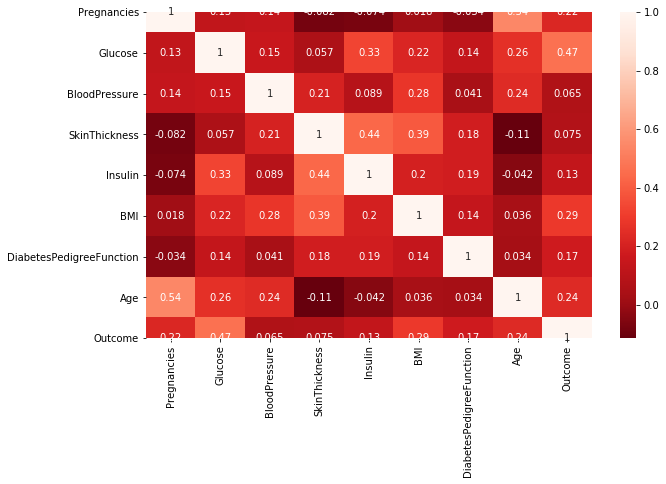

In [12]:
import seaborn as sns 
df = pd.read_csv('diabetes_data.csv')
print(df.head())
df.dropna(inplace=True)
df.describe()

#X = df[df.columns.difference(['Outcome'])]
X = df[['Glucose', 'BMI']]
X = featureNormalization(X) 
y = df['Outcome']
print(X)
print(type(X))
print(type(y))
print(df.corr())


plt.figure(figsize=(10,6))
df_numer_corr = df.corr()
sns.heatmap(df_numer_corr, annot=True, cmap=plt.cm.Reds_r)
plt.show()

In [8]:
target_col_name = 'Outcome'
df_corr = df.corr()
print(df.head())
cor_target = abs(df_corr[target_col_name])
cor_target.sort_values(inplace = True)
#exclude the same ('Temperature (C)') feature 
#cor_target = cor_target[:-1]
cor_target.dropna(inplace=True)
cor_target = cor_target[:-1]
print(cor_target)



def show_correlation_summary(cor_target):
    very_high_correlation = cor_target[(cor_target >= 0.9) & (cor_target <= 1)]
    high_correlation = cor_target[(cor_target >= 0.7) & (cor_target < 0.9)]
    moderate_correlation = cor_target[(cor_target >= 0.5) & (cor_target < 0.7)]
    low_correlation = cor_target[(cor_target >= 0.3) & (cor_target < 0.5)]
    negligible_correlation = cor_target[(cor_target < 0.3)]
    print('very_high_correlation: ', very_high_correlation.index.tolist())
    print('high_correlation: ', high_correlation.index.tolist())
    print('moderate_correlation: ', moderate_correlation.index.tolist())
    print('low_correlation: ', low_correlation.index.tolist())
    print('negligible_correlation (which must be excluded): ', negligible_correlation.index.tolist())
show_correlation_summary(cor_target)
best_feature = cor_target.idxmax()
print('best_feature: ', best_feature)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Name: O

In [13]:
print(X.shape)

(768, 2)


## Divide the dataset into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest=train_test_split(X, y, test_size=0.2,random_state=22)
print(xTrain)

      Glucose       BMI
738 -0.685236  0.584771
178  0.691838  1.650892
185  2.287992  0.495927
647  1.818535  0.737074
654 -0.466156  0.280164
..        ...       ...
491 -0.998208  0.191321
502 -3.783654  0.889377
358 -1.029505  0.419775
356  0.128489  0.165937
132  1.536861  0.318240

[614 rows x 2 columns]


In [15]:
def matrix_data(X_data):
    k = X_data.shape[1] #independent feature count
    n = len(X_data)
    data_vector = np.array(X_data).reshape((n, k))
    #add ones column for intercept
    return np.c_[np.ones(data_vector.shape[0]), data_vector]

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [16]:
xTrain = matrix_data(xTrain)
xTest = matrix_data(xTest)
print(xTrain)
print(xTrain)


def sigmoid(X):
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    return 1.0/(1 + np.exp(-X)) 

[[ 1.         -0.68523633  0.58477051]
 [ 1.          0.69183807  1.65089217]
 [ 1.          2.28799248  0.49592704]
 ...
 [ 1.         -1.02950492  0.41977549]
 [ 1.          0.12848945  0.165937  ]
 [ 1.          1.53686099  0.31824009]]
[[ 1.         -0.68523633  0.58477051]
 [ 1.          0.69183807  1.65089217]
 [ 1.          2.28799248  0.49592704]
 ...
 [ 1.         -1.02950492  0.41977549]
 [ 1.          0.12848945  0.165937  ]
 [ 1.          1.53686099  0.31824009]]


In [17]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    Z = np.dot(X, beta.T)
    
    return sigmoid(Z)

In [43]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    transpose = (logistic_func(beta, X) - Y).T
    return np.dot(transpose, X)

In [19]:
def cost_func(X, Y, beta, lamda):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    n = X.shape[0]
    d = len(beta) - 1
    regular = lamda / 2 * d * (np.sum(beta**2))
    log_0 = np.log(1 - logistic_func(beta, X))
    log_1 = np.log(logistic_func(beta, X))   
    cost = -((Y * log_1) + ((1 - Y) * log_0)) 
    return cost + regular 

In [46]:
def gradient_descent(X, Y, epsilon=1e-4, learning_rate=.01, max_steps=1000, lamda=.01):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    beta = np.zeros(X.shape[1])
    cost = np.mean(cost_func(X, Y, beta, lamda))
    change_cost = 1
    d = X.shape[1]
    num_iter = 1
    
    while (change_cost > epsilon):  
        old_cost = cost
        step_size_0 = learning_rate * gradient(beta, X, Y)[0]
        regul = (lamda/d * beta[1:])
        step_size_1 = learning_rate * (gradient(beta, X, Y)[1:] + regul)
        beta[0] = beta[0] - step_size_0
        beta[1:] = beta[1:] - step_size_1 
        
        cost = np.mean(cost_func(X, Y, beta, lamda)) 
        change_cost = abs(old_cost - cost) 
        
        if (num_iter >= max_steps):
            break
        num_iter += 1
    return beta  

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [53]:
betas_train = gradient_descent(xTrain, yTrain, epsilon=1e-8, learning_rate=1e-4, max_steps=1000, lamda=.01)
print('betas_train: ', betas_train)
betas_test = gradient_descent(xTest, yTest, epsilon=1e-8, learning_rate=1e-4, max_steps=1000, lamda=.01)
print('betas_test: ', betas_test)

betas_train:  [-0.86156145  1.11963517  0.59695449]
betas_test:  [-0.60669711  1.03180305  0.56934426]


In [11]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    return (X - mean)/std 

## Use the logistic regression available in Sklearn on the same data.

In [108]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

model = LogisticRegression(C=100, solver='liblinear', max_iter=1000)
model.fit(xTrain, yTrain)
y_pred_test = model.predict(xTest)
y_pred_train = model.predict(xTrain)
accuracy_train = metrics.accuracy_score(yTrain, y_pred_train)
accuracy_test = metrics.accuracy_score(yTest, y_pred_test)
parameters = model.coef_
print('accuracy_train:', accuracy_train*100) 
print('accuracy_test:', accuracy_test*100) 
print('sklearn_betas:', parameters.flatten())

accuracy_train: 77.0358306188925
accuracy_test: 74.02597402597402
sklearn_betas: [-0.43121754  1.12063274  0.59761584]


In [39]:
cnf_matrix = metrics.confusion_matrix(yTest, y_pred_test)
cnf_matrix

array([[91,  9],
       [33, 21]], dtype=int64)

In [55]:
def predict(threshold, X, beta):
        p_sigmoid = logistic_func(X, beta)
        return pd.Series(np.where(p_sigmoid > threshold, 1, 0))

In [107]:
y_pred_train_my = predict(0.5, xTrain, betas_train)
y_pred_test_my = predict(0.5, xTest, betas_test)

print('my_accuracy_train:', metrics.accuracy_score(yTrain, y_pred_train_my)*100)
print('my_accuracy_test:', metrics.accuracy_score(yTest, y_pred_test_my)*100)
print('my_betas_train:', betas_train)

my_accuracy_train: 77.0358306188925
my_accuracy_test: 75.97402597402598
my_betas_train: [-0.86156145  1.11963517  0.59695449]


## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

In [146]:
def plot_logistic(X, y, beta):
      
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)]  
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='g', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    #decision boundary 
    x1 = np.arange(-2, 3, 0.1) 
    x2 = -(beta[0] + beta[1] * x1) / beta[2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 

Train data set:    


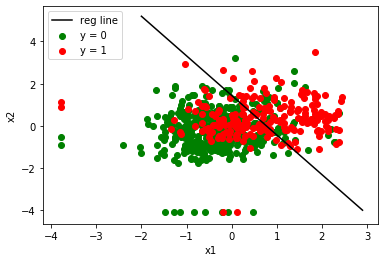

Test data set:     


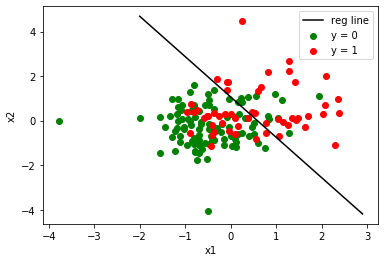

In [147]:
print('Train data set:    ')
plot_logistic(xTrain, yTrain, betas_train)
print('Test data set:     ')
plot_logistic(xTest, yTest, betas_test)

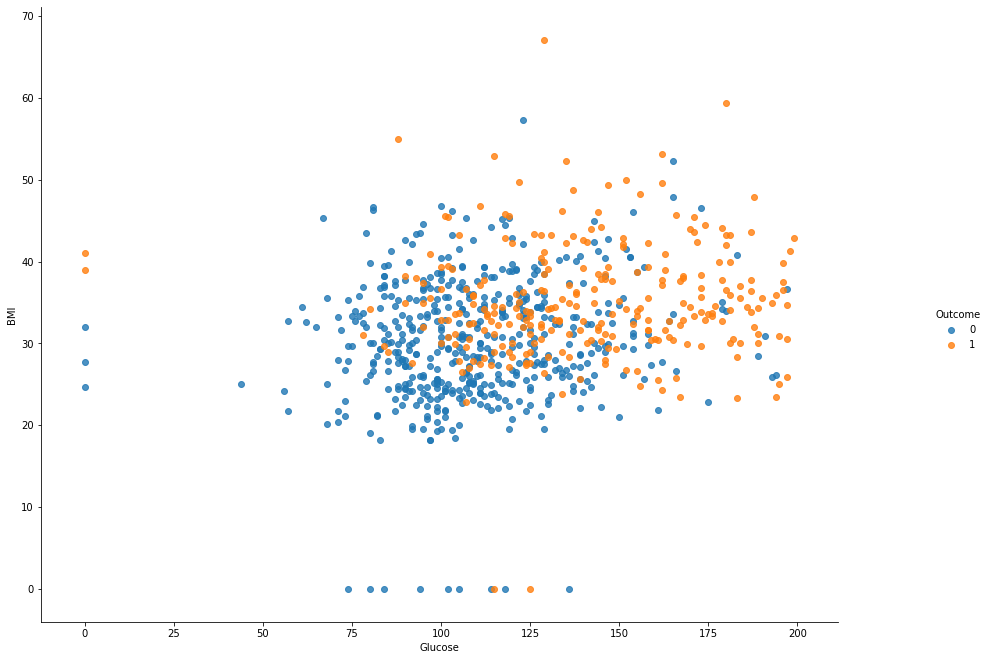

In [134]:
import seaborn as sns

sns.lmplot('Glucose', 'BMI', df, hue='Outcome', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()